In [47]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
client = boto3.client('s3')

In [49]:
path = 'https://mlops-data-course5i13.s3.ap-south-1.amazonaws.com/train.csv'

In [50]:
df = pd.read_csv(path)

In [51]:
df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Tax,Food Charges,Luggage Charges
0,0,0,3,male,22.0,1,0,7.2500,S,2.17500,10.87500,4.35000
1,1,1,1,female,38.0,1,0,71.2833,C,21.38499,106.92495,42.76998
2,2,1,3,female,26.0,0,0,7.9250,S,2.37750,11.88750,4.75500
3,3,1,1,female,35.0,1,0,53.1000,S,15.93000,79.65000,31.86000
4,4,0,3,male,35.0,0,0,8.0500,S,2.41500,12.07500,4.83000


In [52]:
df = df.drop(['Unnamed: 0'],axis=1)

In [53]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Tax,Food Charges,Luggage Charges
0,0,3,male,22.0,1,0,7.2500,S,2.17500,10.87500,4.35000
1,1,1,female,38.0,1,0,71.2833,C,21.38499,106.92495,42.76998
2,1,3,female,26.0,0,0,7.9250,S,2.37750,11.88750,4.75500
3,1,1,female,35.0,1,0,53.1000,S,15.93000,79.65000,31.86000
4,0,3,male,35.0,0,0,8.0500,S,2.41500,12.07500,4.83000


## Missing Values

In [54]:
df.isna().sum()

Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
Fare_Tax           0
Food Charges       0
Luggage Charges    0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         712 non-null    int64  
 1   Pclass           712 non-null    int64  
 2   Sex              712 non-null    object 
 3   Age              712 non-null    float64
 4   SibSp            712 non-null    int64  
 5   Parch            712 non-null    int64  
 6   Fare             712 non-null    float64
 7   Embarked         712 non-null    object 
 8   Fare_Tax         712 non-null    float64
 9   Food Charges     712 non-null    float64
 10  Luggage Charges  712 non-null    float64
dtypes: float64(5), int64(4), object(2)
memory usage: 61.3+ KB


In [56]:
df.Sex = df.Sex.replace({'male':0,'female':1})

In [57]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Tax,Food Charges,Luggage Charges
0,0,3,0,22.0,1,0,7.2500,S,2.17500,10.87500,4.35000
1,1,1,1,38.0,1,0,71.2833,C,21.38499,106.92495,42.76998
2,1,3,1,26.0,0,0,7.9250,S,2.37750,11.88750,4.75500
3,1,1,1,35.0,1,0,53.1000,S,15.93000,79.65000,31.86000
4,0,3,0,35.0,0,0,8.0500,S,2.41500,12.07500,4.83000
...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,1,39.0,0,5,29.1250,Q,8.73750,43.68750,17.47500
708,0,2,0,27.0,0,0,13.0000,S,3.90000,19.50000,7.80000
709,1,1,1,19.0,0,0,30.0000,S,9.00000,45.00000,18.00000
710,1,1,0,26.0,0,0,30.0000,C,9.00000,45.00000,18.00000


In [58]:
df.Embarked.to_list()

['S',
 'C',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'C',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'Q',
 'S',
 'S',
 'S',
 'Q',
 'S',
 'S',
 'S',
 'S',
 'C',
 'S',
 'C',
 'S',
 'S',
 'S',
 'C',
 'S',
 'S',
 'C',
 'Q',
 'S',
 'S',
 'S',
 'C',
 'S',
 'C',
 'S',
 'C',
 'S',
 'S',
 'C',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'C',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'C',
 'C',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'C',
 'S',
 'S',
 'C',
 'S',
 'Q',
 'S',
 'C',
 'S',
 'S',
 'C',
 'S',
 'S',
 'C',
 'S',
 'S',
 'C',
 'S',
 'S',
 'S',
 'S',
 'C',
 'S',
 'S',
 'S',
 'C',
 'S',
 'S',
 'Q',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'C',
 'Q',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'Q',
 'S',
 'S',
 'C',
 'S',
 'C',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'Q',
 'S',
 'S',
 'S',
 'S',
 'S',
 'C',
 'C',
 'S',
 'S',
 'S',
 'S',
 'C',
 'S',
 'S',
 'S',
 'C',
 'Q',
 'C'

In [59]:
df.Embarked = df.Embarked.replace({'S':0,'C':1,'Q':2})

In [60]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Tax,Food Charges,Luggage Charges
0,0,3,0,22.0,1,0,7.2500,0,2.17500,10.87500,4.35000
1,1,1,1,38.0,1,0,71.2833,1,21.38499,106.92495,42.76998
2,1,3,1,26.0,0,0,7.9250,0,2.37750,11.88750,4.75500
3,1,1,1,35.0,1,0,53.1000,0,15.93000,79.65000,31.86000
4,0,3,0,35.0,0,0,8.0500,0,2.41500,12.07500,4.83000


# EDA

In [63]:
corr = df.corr()

<Axes: >

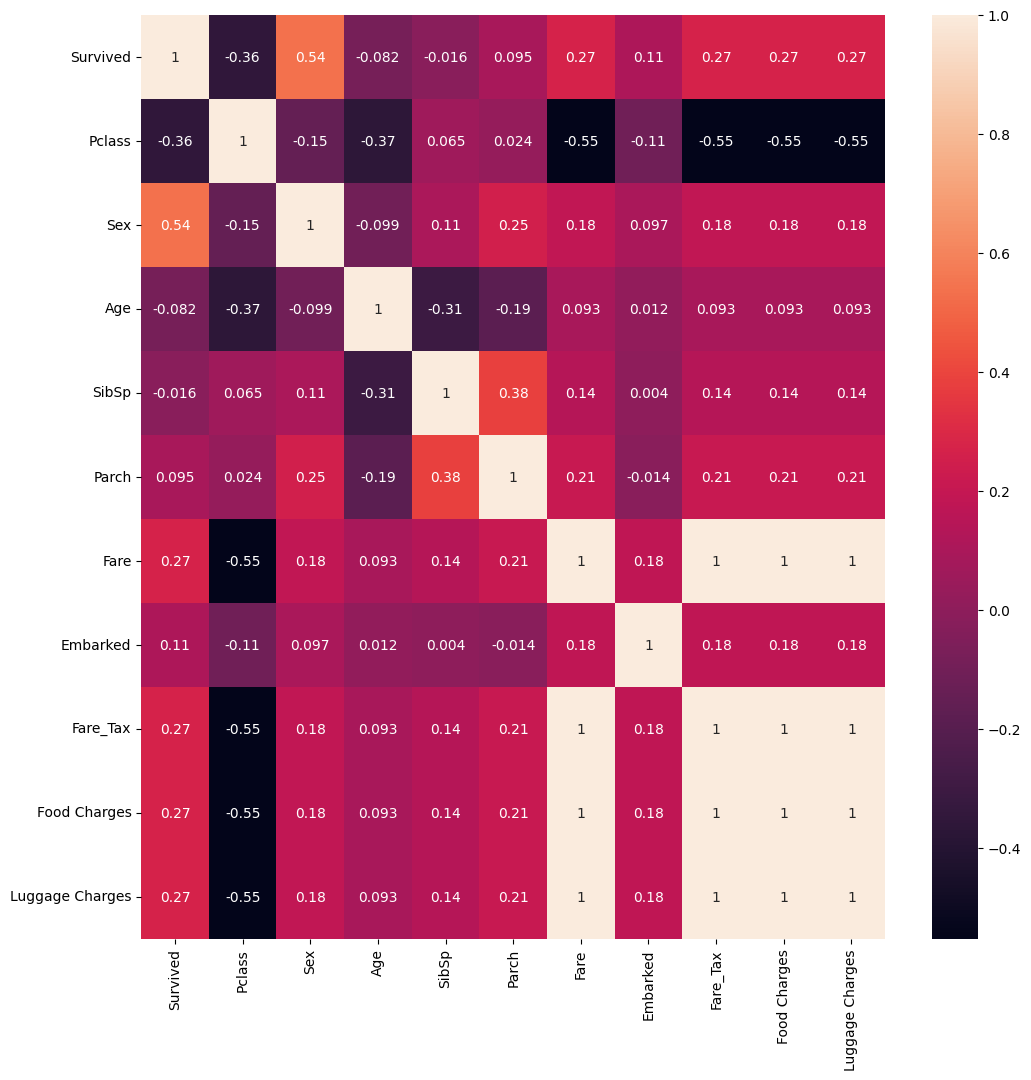

In [64]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)

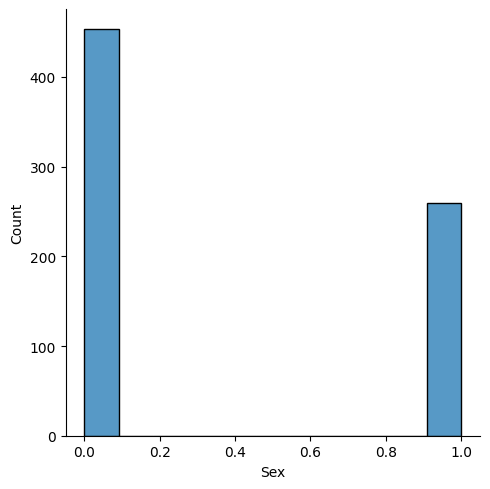

In [70]:
sns.displot(df.Sex)

In [85]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Tax,Food Charges,Luggage Charges
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.363764,29.642093,0.514045,0.432584,34.567251,0.261236,10.370175,51.850877,20.740351
std,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.521561,15.881594,79.407972,31.763189
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,0.000000,2.415000,12.075000,4.830000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.645850,0.000000,4.693755,23.468775,9.387510
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,0.000000,9.900000,49.500000,19.800000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000,153.698760,768.493800,307.397520


In [91]:
df.to_csv('D:\Course5i MLops Practice Project\Titanic Dashboard\Titanic Dashboard\data_source\Titanic_survival.csv',mode='w',index=False)